In [58]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statistics import mean
from datetime import date

In [59]:
# start_date = '2023-4-10' # start of MAGS history
# start_date = '2023-1-1' # start of uptrend
start_date = '2021-1-1' # start of downtrend

symbol = 'SPY'
tickerData = yf.Ticker(symbol)
history = tickerData.history(interval='1d', start=start_date, end=date.today()) # prices are adjusted for splits
history['SMA200'] = history['Close'].rolling(window=200).mean()
history['SMA200_distance'] = history.Close / history.SMA200 - 1
history['SMA50'] = history['Close'].rolling(window=50).mean()
history['SMA50_distance'] = history.Close / history.SMA50 - 1

display(history)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,SMA200,SMA200_distance,SMA50,SMA50_distance
Date,,,,,,,,,,,,
2021-01-04 00:00:00-05:00,355.650101,355.782781,345.709609,349.471649,110210800,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2021-01-05 00:00:00-05:00,348.817786,352.987295,348.770388,351.878571,66426200,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2021-01-06 00:00:00-05:00,350.343454,357.232648,349.784364,353.982300,107997700,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2021-01-07 00:00:00-05:00,356.398757,359.999690,356.218707,359.241608,68766800,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2021-01-08 00:00:00-05:00,360.653536,361.506386,357.346362,361.288452,71677200,0.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-22 00:00:00-04:00,581.049988,584.500000,580.380005,583.320007,34183800,0.0,0.0,0.0,527.717219,0.105365,563.968102,0.034314
2024-10-23 00:00:00-04:00,581.260010,581.710022,574.419983,577.989990,49314600,0.0,0.0,0.0,528.256337,0.094147,564.720253,0.023498
2024-10-24 00:00:00-04:00,579.979980,580.059998,576.570007,579.239990,34979900,0.0,0.0,0.0,528.805271,0.095375,565.463307,0.024364


In [60]:
print('SMA50:', (history.SMA50_distance[50:] <= history.SMA50_distance.iloc[-1]).mean())
print('SMA200:', (history.SMA200_distance[200:] <= history.SMA200_distance.iloc[-1]).mean())
print('SMA50 - 0:', (history.SMA50_distance[50:] <= 0).mean())
print('SMA200 - 0:', (history.SMA200_distance[200:] <= 0).mean())

SMA50: 0.562019758507135
SMA200: 0.7017082785808147
SMA50 - 0: 0.30735455543358947
SMA200 - 0: 0.2890932982917214


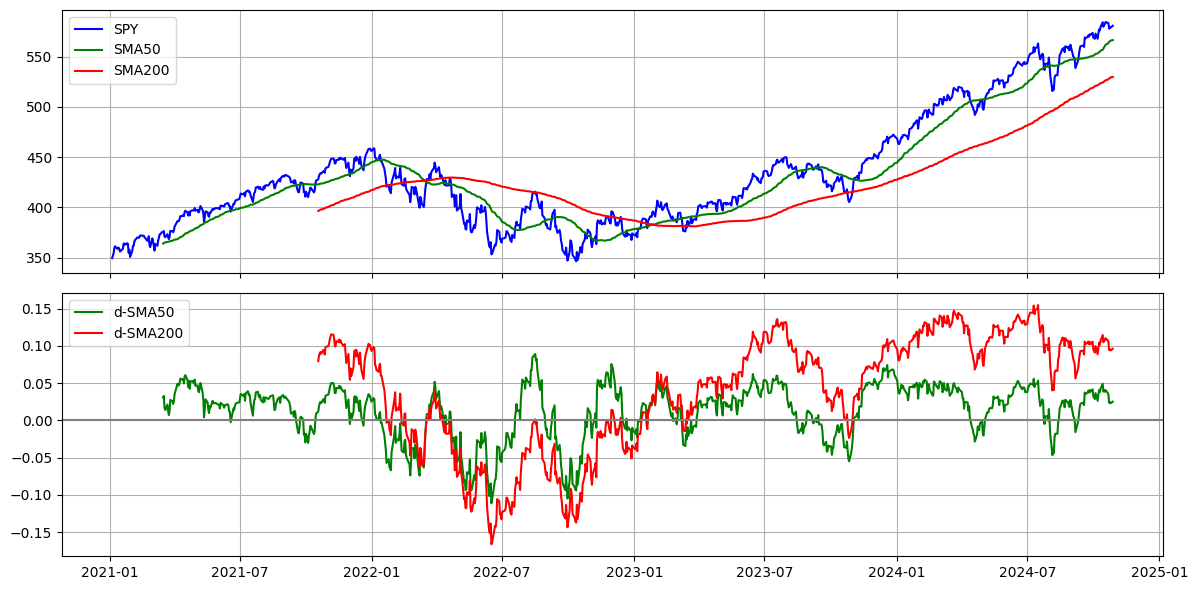

In [61]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6))

ax1.plot(history.Close, color='blue', label=symbol)
ax1.plot(history.SMA50, color='green', label='SMA50')
ax1.plot(history.SMA200, color='red', label='SMA200')
ax1.legend()
ax1.grid()

ax2.plot(history.SMA50_distance, color='green', label='d-SMA50')
ax2.plot(history.SMA200_distance, color='red', label='d-SMA200')
ax2.axhline(y=0, color='gray')
ax2.legend()
ax2.grid()

plt.tight_layout()
plt.show()